In [1]:
import re
from collections import Counter
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd
import requests
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import time

In [2]:
def getips(location):
    with open(location) as f:
        logs=f.read()
        #regexp=r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
        regexp="(.*?)- -"
        re2='(GET|POST|OPTIONS)(.*?)(HTTP)'
    return re.findall(regexp,logs),re.findall(re2,logs)

def gettimestamps(location):
    with open(location) as f:
        logs=f.read()
        regexp='\[(.*?)\]'
    return re.findall(regexp,logs)
def get_size(location):
    mylist=[]
    with open(location) as f:
        for logs in f:
            regexp='\d+$'
            mylist.append(re.findall(regexp,logs))
    return mylist

In [2]:
def get_location(ip):
    response = requests.get("https://geolocation-db.com/json/{}&position=true".format(ip)).json()
    return response['country_name']

In [4]:
def getstatuscode(location):
    mylist=[]
    with open(location) as f:
        for logs in f:
            regexp='\d+$'
            temp=logs
            val=re.sub(regexp,'',temp)
            mylist.append(re.findall('\d+\s$',val))
    return mylist

In [546]:
statuscode=getstatuscode("C:\\Users\\arjun\\Desktop\\logfile1.txt")
newsize=[]
for i in range(len(statuscode)-6):
    if statuscode[i]!=[]:
        newsize.append(int(statuscode[i][0]))
    else:
        newsize.append(0)

data['statuscode']=newsize

In [509]:
mysize=get_size("C:\\Users\\arjun\\Desktop\\logfile1.txt")
len(mysize)

1546

In [287]:
def getfreq(mylist):
    return dict(Counter(mylist))

In [291]:
allips,websites=getips("C:\\Users\\arjun\\Desktop\\logfile1.txt")
freq=getfreq(allips)
timestamps=gettimestamps("C:\\Users\\arjun\\Desktop\\logfile1.txt")
websites

[('GET',
  ' /twiki/bin/edit/Main/Double_bounce_sender?topicparent=Main.ConfigurationVariables ',
  'HTTP'),
 ('GET', ' /twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1.3&rev2=1.2 ', 'HTTP'),
 ('GET', ' /mailman/listinfo/hsdivision ', 'HTTP'),
 ('GET', ' /twiki/bin/view/TWiki/WikiSyntax ', 'HTTP'),
 ('GET', ' /twiki/bin/view/Main/DCCAndPostFix ', 'HTTP'),
 ('GET',
  ' /twiki/bin/oops/TWiki/AppendixFileSystem?template=oopsmore&param1=1.12&param2=1.12 ',
  'HTTP'),
 ('GET', ' /twiki/bin/view/Main/PeterThoeny ', 'HTTP'),
 ('GET',
  ' /twiki/bin/edit/Main/Header_checks?topicparent=Main.ConfigurationVariables ',
  'HTTP'),
 ('GET', ' /twiki/bin/attach/Main/OfficeLocations ', 'HTTP'),
 ('GET', ' /twiki/bin/view/TWiki/WebTopicEditTemplate ', 'HTTP'),
 ('GET', ' /twiki/bin/view/Main/WebChanges ', 'HTTP'),
 ('GET',
  ' /twiki/bin/edit/Main/Smtpd_etrn_restrictions?topicparent=Main.ConfigurationVariables ',
  'HTTP'),
 ('GET', ' /mailman/listinfo/business ', 'HTTP'),
 ('GET', ' /twiki/bin/rdiff/Main

In [404]:
print(len(allips),len(websites),len(timestamps))

1546 1540 1546


In [405]:
temp=timestamps
for i in temp:
    if i=='^A-Za-z':
        timestamps.remove('^A-Za-z')

In [406]:
print(len(allips),len(websites),len(timestamps))

1546 1540 1546


In [416]:
data=pd.DataFrame()

In [417]:
data['IP']=allips
len(data)


1546

In [418]:
data['TimeStamp']=timestamps

In [421]:
data.iloc[906]

IP           h24-71-236-129.ca.shawcable.net 
TimeStamp          09/Mar/2004:14:43:02 -0800
Name: 907, dtype: object

In [420]:
data=data.drop(906)
data=data.drop(1545)
data=data.drop(1544)
data=data.drop(1543)
data=data.drop(1542)
data=data.drop(1541)

In [397]:
"""data['websites']=websites
for i in range(len(data["websites"])):
    data.iloc[i]"""

'data[\'websites\']=websites\nfor i in range(len(data["websites"])):\n    data.iloc[i]'

In [414]:
len(data)
ranger=[]
for i in range(1540):
    ranger.append(i)
data=data.reindex(ranger)
data.iloc[906]

IP           NaN
TimeStamp    NaN
Name: 906, dtype: object

In [432]:
#data['websites'][0]=data['websites'][0][1]
#a=data['websites'][0][1]
#data['websites'][0]=a
for i in range(len(websites)):
    websites[i]=websites[i][1]


In [433]:
websites

[' /twiki/bin/edit/Main/Double_bounce_sender?topicparent=Main.ConfigurationVariables ',
 ' /twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1.3&rev2=1.2 ',
 ' /mailman/listinfo/hsdivision ',
 ' /twiki/bin/view/TWiki/WikiSyntax ',
 ' /twiki/bin/view/Main/DCCAndPostFix ',
 ' /twiki/bin/oops/TWiki/AppendixFileSystem?template=oopsmore&param1=1.12&param2=1.12 ',
 ' /twiki/bin/view/Main/PeterThoeny ',
 ' /twiki/bin/edit/Main/Header_checks?topicparent=Main.ConfigurationVariables ',
 ' /twiki/bin/attach/Main/OfficeLocations ',
 ' /twiki/bin/view/TWiki/WebTopicEditTemplate ',
 ' /twiki/bin/view/Main/WebChanges ',
 ' /twiki/bin/edit/Main/Smtpd_etrn_restrictions?topicparent=Main.ConfigurationVariables ',
 ' /mailman/listinfo/business ',
 ' /twiki/bin/rdiff/Main/WebIndex?rev1=1.2&rev2=1.1 ',
 ' /twiki/bin/view/TWiki/DontNotify ',
 ' /twiki/bin/view/Main/TokyoOffice ',
 ' /twiki/bin/view/Main/MikeMannix ',
 ' /twiki/bin/attach/Main/PostfixCommands ',
 ' /robots.txt ',
 ' /twiki/bin/rdiff/Know/ReadmeFirs

In [434]:
data['websites']=websites

In [455]:
date=timestamps[0][:2]
date

'07'

In [464]:
date=[]
for i in range(len(data)):
    date.append(timestamps[i][:2])

In [466]:
data['date']=date


In [486]:
month=[]
for i in range(len(data)):
    month.append(timestamps[i][3:6])

In [493]:
time=[]
for i in range(len(data)):
    time.append(timestamps[i][12:20])
data['time']=time

In [487]:
data['month']=month

In [514]:
mysize[1][0]

'4523'

In [524]:
newsize=[]
for i in range(len(mysize)-6):
    if mysize[i]!=[]:
        newsize.append(int(mysize[i][0]))
    else:
        newsize.append(0)
        

In [526]:
data['size']=newsize

In [496]:
data.drop(['TimeStamp'],axis=1,inplace=True)

In [547]:
data

,IP,websites,date,month,time,size,statuscode
0,64.242.88.10,/twiki/bin/edit/Main/Double_bounce_sender?top...,07,Mar,16:05:49,12846,401
1,64.242.88.10,/twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1...,07,Mar,16:06:51,4523,200
2,64.242.88.10,/mailman/listinfo/hsdivision,07,Mar,16:10:02,6291,200
3,64.242.88.10,/twiki/bin/view/TWiki/WikiSyntax,07,Mar,16:11:58,7352,200
4,64.242.88.10,/twiki/bin/view/Main/DCCAndPostFix,07,Mar,16:20:55,5253,200
...,...,...,...,...,...,...,...
1536,10.0.0.153,/dccstats/stats-spam-ratio.1year.png,12,Mar,12:23:41,3438,200
1537,10.0.0.153,/dccstats/stats-hashes.1year.png,12,Mar,12:23:41,1670,200
1538,10.0.0.153,/mailman/listinfo/webber,12,Mar,12:23:41,2651,200
1539,10.0.0.153,/razor.html,12,Mar,12:23:41,2023,200


In [35]:
ip=[]
count=[]
for key,value in freq.items():
    if value>1:
        ip.append(key)
        count.append(value)
    

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

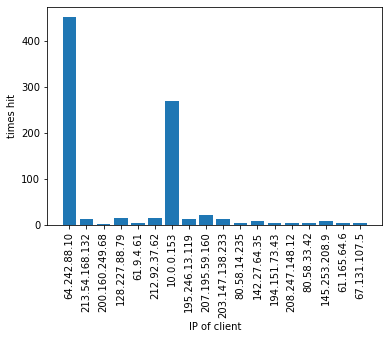

In [36]:
plt.bar(ip,count)
plt.xlabel("IP of client")
plt.ylabel("times hit")
plt.xticks(rotation=90)

In [548]:
data

,IP,websites,date,month,time,size,statuscode
0,64.242.88.10,/twiki/bin/edit/Main/Double_bounce_sender?top...,07,Mar,16:05:49,12846,401
1,64.242.88.10,/twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1...,07,Mar,16:06:51,4523,200
2,64.242.88.10,/mailman/listinfo/hsdivision,07,Mar,16:10:02,6291,200
3,64.242.88.10,/twiki/bin/view/TWiki/WikiSyntax,07,Mar,16:11:58,7352,200
4,64.242.88.10,/twiki/bin/view/Main/DCCAndPostFix,07,Mar,16:20:55,5253,200
...,...,...,...,...,...,...,...
1536,10.0.0.153,/dccstats/stats-spam-ratio.1year.png,12,Mar,12:23:41,3438,200
1537,10.0.0.153,/dccstats/stats-hashes.1year.png,12,Mar,12:23:41,1670,200
1538,10.0.0.153,/mailman/listinfo/webber,12,Mar,12:23:41,2651,200
1539,10.0.0.153,/razor.html,12,Mar,12:23:41,2023,200


In [549]:
data.to_csv("final_logs.csv")

In [5]:
data=pd.read_csv("final_logs.csv")

In [6]:
data

,Unnamed: 0,IP,websites,date,month,time,size,statuscode
0,0,64.242.88.10,/twiki/bin/edit/Main/Double_bounce_sender?top...,7,Mar,16:05:49,12846,401
1,1,64.242.88.10,/twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1...,7,Mar,16:06:51,4523,200
2,2,64.242.88.10,/mailman/listinfo/hsdivision,7,Mar,16:10:02,6291,200
3,3,64.242.88.10,/twiki/bin/view/TWiki/WikiSyntax,7,Mar,16:11:58,7352,200
4,4,64.242.88.10,/twiki/bin/view/Main/DCCAndPostFix,7,Mar,16:20:55,5253,200
...,...,...,...,...,...,...,...,...
1535,1536,10.0.0.153,/dccstats/stats-spam-ratio.1year.png,12,Mar,12:23:41,3438,200
1536,1537,10.0.0.153,/dccstats/stats-hashes.1year.png,12,Mar,12:23:41,1670,200
1537,1538,10.0.0.153,/mailman/listinfo/webber,12,Mar,12:23:41,2651,200
1538,1539,10.0.0.153,/razor.html,12,Mar,12:23:41,2023,200


In [7]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
data

,IP,websites,date,month,time,size,statuscode
0,64.242.88.10,/twiki/bin/edit/Main/Double_bounce_sender?top...,7,Mar,16:05:49,12846,401
1,64.242.88.10,/twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1...,7,Mar,16:06:51,4523,200
2,64.242.88.10,/mailman/listinfo/hsdivision,7,Mar,16:10:02,6291,200
3,64.242.88.10,/twiki/bin/view/TWiki/WikiSyntax,7,Mar,16:11:58,7352,200
4,64.242.88.10,/twiki/bin/view/Main/DCCAndPostFix,7,Mar,16:20:55,5253,200
...,...,...,...,...,...,...,...
1535,10.0.0.153,/dccstats/stats-spam-ratio.1year.png,12,Mar,12:23:41,3438,200
1536,10.0.0.153,/dccstats/stats-hashes.1year.png,12,Mar,12:23:41,1670,200
1537,10.0.0.153,/mailman/listinfo/webber,12,Mar,12:23:41,2651,200
1538,10.0.0.153,/razor.html,12,Mar,12:23:41,2023,200


In [9]:
ip_freq=data['IP'].value_counts()

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

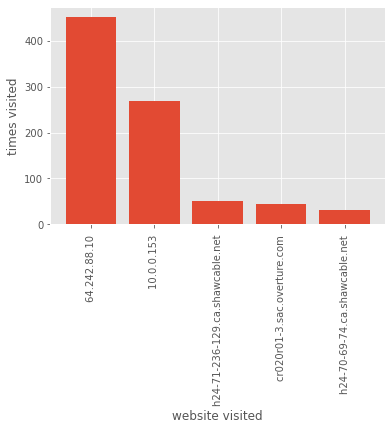

In [61]:
index=list(ip_freq[:5].index)
plt.bar(index,ip_freq[:5])
plt.xlabel("website visited")
plt.ylabel("times visited")
plt.xticks(rotation=90)

In [11]:
codes=data['statuscode'].value_counts()
codes=codes.drop(0)

Text(0, 0.5, 'times generated')

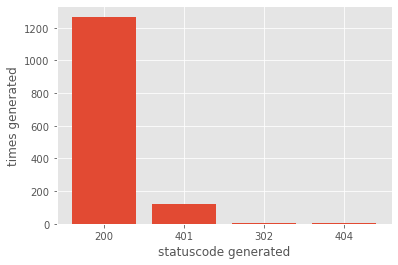

In [12]:
plt.bar(['200','401','302','404'],codes)
plt.xlabel("statuscode generated")
plt.ylabel("times generated")

In [41]:

start = time.time()
already=[]
records=[]
location=[]
counter=0
for i in data['IP']:
    i=str(i)
    if i not in already:
        try:
            temp=get_location(i)
            already.append(i)
            records.append([i,temp])
            location.append(temp)
            print(counter)
            counter+=1
        except:
            pass
    else:
        for k in records:
            if k[0]==i:
                location.append(k[1])
        print(counter)
        counter+=1
print(time.time()-start)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
unique_ip=data['IP'].unique()

In [15]:
len(unique_ip)

168

In [16]:
unique_ip

array(['64.242.88.10 ', 'lordgun.org ', 'lj1036.inktomisearch.com ',
       'lj1090.inktomisearch.com ', 'lj1125.inktomisearch.com ',
       'd207-6-9-183.bchsia.telus.net ',
       '80-219-148-207.dclient.hispeed.ch ',
       '206-15-133-181.dialup.ziplink.net ',
       'mmscrm07-2.sac.overture.com ', 'h24-70-56-49.ca.shawcable.net ',
       'bh02i525f01.au.ibm.com ', 'h24-71-249-14.ca.shawcable.net ',
       'calcite.rhyolite.com ', 'lj1088.inktomisearch.com ',
       'dsl-80-43-113-44.access.uk.tiscali.com ',
       'lj1089.inktomisearch.com ', 'lj1016.inktomisearch.com ',
       'lj1025.inktomisearch.com ', 'prxint-sxb3.e-i.net ',
       'prxint-sxb2.e-i.net ', 'rouble.cc.strath.ac.uk ', '213.181.81.4 ',
       'lj1159.inktomisearch.com ', 'p213.54.168.132.tisdip.tiscali.de ',
       '200.160.249.68.bmf.com.br ', '68-174-110-154.nyc.rr.com ',
       '66-194-6-70.gen.twtelecom.net ', 'lj1027.inktomisearch.com ',
       '128.227.88.79 ', '61.9.4.61 ', 'mcl02.cnc.bc.ca ',
       'p508

In [42]:
locate=pd.Series(location)

In [44]:
freq_locate=locate.value_counts()

In [40]:
get_location(data['IP'][0])

'United States'

In [37]:
for i in range(len(data['IP'])):
    data['IP'][i]=data['IP'][i][:-1]

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
locate_index=list(freq_locate.index)

In [57]:
freq_locate=list(freq_locate)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

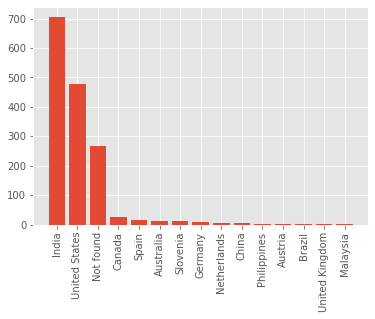

In [60]:
plt.bar(locate_index,freq_locate)
plt.xticks(rotation=90)

In [69]:
visited=[]

In [70]:
for i in data['websites']:
    visited.append(i[1:-1])


In [75]:
visit_website=[]
regexp="^/(.*?)/"
for i in visited:
    try:
        temp=re.findall(regexp,i)[0]
        visit_website.append(temp)
    except:
        visit_website.append("")

In [76]:
visit_website

['twiki',
 'twiki',
 'mailman',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'mailman',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 '',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'mailman',
 '',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 '',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'pipermail',
 'pipermail',
 'twiki',
 'twiki',
 'pipermail',
 'twiki',
 'twiki',
 'mailman',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'mailman',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'mailman',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 'twiki',
 '',
 'twiki',
 'twiki',
 'twiki',
 'twik

In [77]:
cleaned_visited=[]
for i in visit_website:
    if i!='':
        cleaned_visited.append(i)

In [79]:
cleaned_visited=pd.Series(cleaned_visited)

In [80]:
cleaned_visited.value_counts()

twiki        762
dccstats     181
cgi-bin      144
mailman      117
icons        111
images        24
pipermail     14
MSOffice       1
_vti_bin       1
dtype: int64

Text(0, 0.5, 'number of times used')

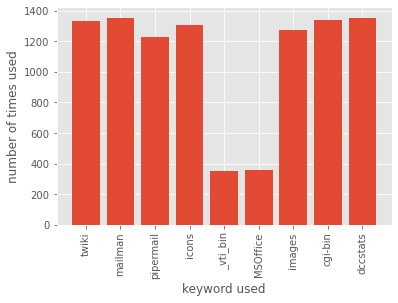

In [85]:
index_visited=list(cleaned_visited.index)
plt.bar(list(cleaned_visited),index_visited)
plt.xticks(rotation=90)
plt.xlabel("keyword used")
plt.ylabel("number of times used")